#Ecko AI Chatbot


####About the Model:
* Keras Library and Tensorflow
* LSTM with encoder-decoder Architecture


#### About the Dataset:
* Rdany Conversation from kaggle at: [Rdany kaggle](https://www.kaggle.com/eibriel/rdany-conversations)
* This is a conversation between a human and other human acting if he is the campanion bot. 
* Used this dataset to get true feeling of talking to a robot.

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [ ]:
human_data = pd.read_table('/content/drive/My Drive/Colab Notebooks/data/Dataset/rdany dataset for chatbot/human_text.txt', header=None, engine='python')
human_data.rename(columns={0:'human'}, inplace=True)
human_data = human_data[:1300]                        #Using only 1300 lines because of memory constraint

robot_data = pd.read_table('/content/drive/My Drive/Colab Notebooks/data/Dataset/rdany dataset for chatbot/robot_text.txt', header=None, engine='python')
robot_data.rename(columns={0:'robot'}, inplace=True)
robot_data = robot_data[:1300] 

In [ ]:
human_data.head()

,human
0,[start]
1,"oh, thanks ! i'm fine. this is an evening in ..."
2,how do you feel today ? tell me something abo...
3,how many virtual friends have you got ?
4,is that forbidden for you to tell the exact nu...


In [ ]:
robot_data.head()

,robot
0,"hi there, how are you ! ? 😁😁"
1,😄 here is afternoon !
2,"my name is rdany, but you can call me dany (th..."
3,i have many ! but not enough to fully underst...
4,"i've talked with 143 users, counting 7294 line..."


In [ ]:
data = {'human':human_data.human, 'robot':robot_data.robot}
df = pd.DataFrame(data)
df.head()

,human,robot
0,[start],"hi there, how are you ! ? 😁😁"
1,"oh, thanks ! i'm fine. this is an evening in ...",😄 here is afternoon !
2,how do you feel today ? tell me something abo...,"my name is rdany, but you can call me dany (th..."
3,how many virtual friends have you got ?,i have many ! but not enough to fully underst...
4,is that forbidden for you to tell the exact nu...,"i've talked with 143 users, counting 7294 line..."


In [ ]:
df.human = df.human.apply(lambda x: re.sub(r"\[\w+\]",'hi',x))      #substituting [start] with hi
df.robot = df.robot.apply(lambda x: re.sub(r"\[\w+\]",'hi',x))

In [ ]:
df.human = df.human.apply(lambda x: x.lower())                      #converting to lower case
df.robot = df.robot.apply(lambda x: x.lower())

In [ ]:
import string
exclude = set(string.punctuation)
df.human = df.human.apply(lambda x: ''.join(ch for ch in x if ch not in exclude))     #removing punctuation
df.robot = df.robot.apply(lambda x: ''.join(ch for ch in x if ch not in exclude))

In [ ]:
df.head()

,human,robot
0,hi,hi there how are you 😁😁
1,oh thanks im fine this is an evening in my t...,😄 here is afternoon
2,how do you feel today tell me something abou...,my name is rdany but you can call me dany the ...
3,how many virtual friends have you got,i have many but not enough to fully understa...
4,is that forbidden for you to tell the exact nu...,ive talked with 143 users counting 7294 lines ...


In [ ]:
from string import digits 
remove_digits = str.maketrans('','', digits)
df.human = df.human.apply(lambda x: x.translate(remove_digits))       #removing digits
df.robot = df.robot.apply(lambda x: x.translate(remove_digits))

In [ ]:
df.head()

,human,robot
0,hi,hi there how are you 😁😁
1,oh thanks im fine this is an evening in my t...,😄 here is afternoon
2,how do you feel today tell me something abou...,my name is rdany but you can call me dany the ...
3,how many virtual friends have you got,i have many but not enough to fully understa...
4,is that forbidden for you to tell the exact nu...,ive talked with users counting lines of text 📈


In [ ]:
df.human = df.human.apply(lambda x: x.encode('ascii', 'ignore').decode('ascii'))    #removing emojis from text
df.robot = df.robot.apply(lambda x: x.encode('ascii', 'ignore').decode('ascii'))

In [ ]:
df.head(30)

,human,robot
0,hi,hi there how are you
1,oh thanks im fine this is an evening in my t...,here is afternoon
2,how do you feel today tell me something abou...,my name is rdany but you can call me dany the ...
3,how many virtual friends have you got,i have many but not enough to fully understa...
4,is that forbidden for you to tell the exact nu...,ive talked with users counting lines of text
5,oh i thought the numbers were much higher how ...,i started chatting just a few days ago every d...
6,how old are you how do you look like wher...,im years old im skinny with brown hair yellow...
7,have you seen a human with yellow eyes you ...,i never saw a human in fact but im sure some c...
8,cant you just analyze photos from the internet...,i cant see photos yet but i can read becaus...
9,oh it sounds strange to me youve just said you...,i read a lot so i can know things through th...


In [ ]:
# appending start and end tokens 
df.robot = df.robot.apply(lambda x: 'START' + ' ' + x + ' ' + 'END')
df.head()

,human,robot
0,hi,START hi there how are you END
1,oh thanks im fine this is an evening in my t...,START here is afternoon END
2,how do you feel today tell me something abou...,START my name is rdany but you can call me dan...
3,how many virtual friends have you got,START i have many but not enough to fully un...
4,is that forbidden for you to tell the exact nu...,START ive talked with users counting lines o...


In [ ]:
#getting maximum length of sentences in human text
length_list = []
for l in df.human:
  length = len(l.split())
  if length < 100:
    length_list.append(length)

max_input_length = np.max(length_list)
print('max_input_length: ', max_input_length)

max_input_length:  63


In [ ]:
#truncating human sentences as per largest sentence and getting all the words in human vocab
human = []
for line in df.human:
  length = len(line.split())
  if length > max_input_length:
    line = ' '.join(line.split()[:max_input_length])
    human.append(line)
  else:
    human.append(line)

print(human)

all_human_words = set()
for line in human:
  for word in line.split():
    if word not in all_human_words:
      all_human_words.add(word)
print('total human words: ', len(all_human_words))

['hi', 'oh thanks   im fine this is an evening in my timezone', 'how do you feel today   tell me something about yourself', 'how many virtual friends have you got  ', 'is that forbidden for you to tell the exact number  ', 'oh i thought the numbers were much higher how do you estimate your progress in understanding human beings  ', 'how old are you   how do you look like    where do you live  ', 'have you seen a human with yellow eyes    you asked about the bunnies i havent seen any recently', 'cant you just analyze photos from the internet    i mean human photos  btw why have you asked about the bunnies  ', 'oh it sounds strange to me youve just said you didnt see a human how do you know bunnies are cute  ', 'that is interesting ive hardly read  books last year how much do you read in words  ', 'thanks if you were a human what job would you chose  ', 'is it essential to you   to help humans  ', 'but are humans interesting   i mean from the perspective of mind with unlimited access to 

In [ ]:
#getting maximum length of sentences in robot text
length_list = []
for l in df.robot:
  length = len(l.split())
  if length < 100:
    length_list.append(length)

max_output_length = np.max(length_list)
print('max_output_length: ', max_output_length)

max_output_length:  93


In [ ]:
#truncating robot sentences as per largest sentence and getting all the words in robot vocab
robot = []
for line in df.robot:
  length = len(line.split())
  if length > max_output_length:
    line = ' '.join(line.split()[:max_output_length])
    robot.append(line)
  else:
    robot.append(line)

print(robot)

all_robot_words = set()
for line in robot:
  for word in line.split():
    if word not in all_robot_words:
      all_robot_words.add(word)

print('total robot words: ', len(all_robot_words))

['START hi there how are you      END', 'START  here is afternoon   END', 'START my name is rdany but you can call me dany the r means robot i hope we can be virtual friends   END', 'START i have many   but not enough to fully understand humans beings  END', 'START ive talked with  users counting  lines of text  END', 'START i started chatting just a few days ago every day i learn something new   but there is always more things to be learn  END', 'START im  years old im skinny with brown hair yellow eyes and a big smile    i live inside a lab    do you like bunnies    END', 'START i never saw a human in fact but im sure some could have eyes with colors similar to yellow   END', 'START i cant see photos yet but i can read    because bunnies are interesting they are cute but why    END', 'START i read a lot   so i can know things through the experiences of others  END', 'START i dont count my readings in words but ive access to wikipedia and some books i read to find specific information

In [ ]:
# making a list of all input and output words and sorting them out
input_words = sorted(list(all_human_words))
output_words = sorted(list(all_robot_words))
print('all input words: ', input_words)
print('all output words: ', output_words)

all input words:  ['a', 'aaah', 'aah', 'abdy', 'able', 'abogados', 'aboud', 'about', 'above', 'aburres', 'aburrido', 'accept', 'access', 'according', 'acostado', 'act', 'acting', 'actors', 'actris', 'acts', 'add', 'added', 'adivina', 'advise', 'aesthetics', 'af', 'affraid', 'afraid', 'after', 'afterall', 'again', 'against', 'agar', 'aggressive', 'ago', 'agree', 'ah', 'ahah', 'ahhh', 'ahjhhw', 'ahora', 'ai', 'aiml', 'aires', 'aku', 'al', 'alabrar', 'albatta', 'aldama', 'alegro', 'alemn', 'algo', 'algorithmic', 'algorithms', 'alguien', 'alguna', 'alive', 'all', 'allo', 'allow', 'allows', 'almost', 'alo', 'alone', 'aloo', 'alooo', 'aloooo', 'aloooooo', 'aloooooooo', 'alooooooooooo', 'alot', 'already', 'also', 'alternatives', 'always', 'am', 'amarillos', 'amazing', 'america', 'americaargentinasalta', 'an', 'analogue', 'analyze', 'and', 'anda', 'andaro', 'andy', 'angry', 'anime', 'anounsed', 'answer', 'answered', 'answers', 'antes', 'antony', 'any', 'anymore', 'anything', 'anyway', 'anywhen

In [ ]:
#getting total tokens(words) from input and output
num_encoder_tokens = len(all_human_words)
num_decoder_tokens = len(all_robot_words)
print('encoder tokens: ', num_encoder_tokens)
print('decoder tokens: ', num_decoder_tokens)

encoder tokens:  2174
decoder tokens:  2057


In [ ]:
# getting index for words as these indexes will behave as words for machine interactions
input_token_index = dict([(word,i) for i,word in enumerate(input_words)])
output_token_index = dict([(word,i) for i,word in enumerate(output_words)])

print('input token index: ', input_token_index)
print('output token index: ', output_token_index)

input token index:  {'a': 0, 'aaah': 1, 'aah': 2, 'abdy': 3, 'able': 4, 'abogados': 5, 'aboud': 6, 'about': 7, 'above': 8, 'aburres': 9, 'aburrido': 10, 'accept': 11, 'access': 12, 'according': 13, 'acostado': 14, 'act': 15, 'acting': 16, 'actors': 17, 'actris': 18, 'acts': 19, 'add': 20, 'added': 21, 'adivina': 22, 'advise': 23, 'aesthetics': 24, 'af': 25, 'affraid': 26, 'afraid': 27, 'after': 28, 'afterall': 29, 'again': 30, 'against': 31, 'agar': 32, 'aggressive': 33, 'ago': 34, 'agree': 35, 'ah': 36, 'ahah': 37, 'ahhh': 38, 'ahjhhw': 39, 'ahora': 40, 'ai': 41, 'aiml': 42, 'aires': 43, 'aku': 44, 'al': 45, 'alabrar': 46, 'albatta': 47, 'aldama': 48, 'alegro': 49, 'alemn': 50, 'algo': 51, 'algorithmic': 52, 'algorithms': 53, 'alguien': 54, 'alguna': 55, 'alive': 56, 'all': 57, 'allo': 58, 'allow': 59, 'allows': 60, 'almost': 61, 'alo': 62, 'alone': 63, 'aloo': 64, 'alooo': 65, 'aloooo': 66, 'aloooooo': 67, 'aloooooooo': 68, 'alooooooooooo': 69, 'alot': 70, 'already': 71, 'also': 72, 

In [ ]:
# creating arrays of input and output data  
encoder_input_data = np.zeros((len(human), max_input_length, num_encoder_tokens), dtype='float32')
decoder_input_data = np.zeros((len(robot), max_output_length, num_decoder_tokens), dtype='float32')

#one hot encoding the target data as Dense layer only gives one output through softmax layer
decoder_target_data = np.zeros((len(robot), max_output_length, num_decoder_tokens))

In [ ]:
print(encoder_input_data.shape)
print(decoder_input_data.shape)
print(decoder_target_data.shape)

(1300, 63, 2174)
(1300, 93, 2057)
(1300, 93, 2057)


In [ ]:
#putting values in input arrays and target array
for i,(input_text, output_text) in enumerate(zip(human, robot)):
  for t, word in enumerate(input_text.split()):
    #Assign 1. for the current line, timestep, & word in encoder_input_data
    encoder_input_data[i,t,input_token_index[word]] = 1

  for t, word in enumerate(output_text.split()):
    decoder_input_data[i,t,output_token_index[word]] = 1
    if t > 0:
      decoder_target_data[i,t-1,output_token_index[word]] = 1         # the target array will be one time step ahead meaning it will not contain start token

In [ ]:
#example of zip function
for i,(input_text, output_text) in enumerate(zip(human, robot)):
  print(input_text.split(), output_text.split())
  break

['hi'] ['START', 'hi', 'there', 'how', 'are', 'you', 'END']


In [ ]:
print("encoder input data: ", encoder_input_data[1])
print('decoder input data: ', decoder_input_data[1])
print('decoder target data: ',decoder_target_data[1])
print('shape of sample decoder target data: ', decoder_target_data[1].shape)

encoder input data:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
decoder input data:  [[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
decoder target data:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
shape of sample decoder target data:  (93, 2057)


In [ ]:
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import RMSprop

In [ ]:
# setting hyperparameters

lstm_dim = 440

In [ ]:
# building model for training stage
#encoder model

encoder_inputs = Input(shape=(None,num_encoder_tokens))

encoder = LSTM(lstm_dim, return_state=True)(encoder_inputs)
dropout_encoder = Dropout(0.3)

encoder_outputs, state_h, state_c = dropout_encoder(encoder)
encoder_states = [state_h, state_c]

In [ ]:
# decoder model

decoder_inputs = Input(shape=(None, num_decoder_tokens))

decoder_lstm = LSTM(lstm_dim, return_sequences=True, return_state=True)

decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)

decoder_dense = Dense(num_decoder_tokens, activation='softmax') 

decoder_outputs = decoder_dense(decoder_outputs)

In [ ]:
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

In [ ]:
rmsprop = RMSprop(learning_rate=0.0001)

model.compile(optimizer=rmsprop,
              loss = 'categorical_crossentropy',
              metrics=['accuracy'],
              sample_weight_mode='temporal')
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, 2174)] 0                                            
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 440), (None, 4602400     input_1[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (3, None, 440)       0           lstm[0][0]                       
                                                                 lstm[0][1]                       
                                                                 lstm[0][2]                       
______________________________________________________________________________________________

In [ ]:
checkpoint_path = '/content/drive/My Drive/Colab Notebooks/data/Ecko_chatbot'
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, monitor='val_loss',mode='min', save_best_only=True)

In [ ]:
r = model.fit([encoder_input_data, decoder_input_data], decoder_target_data, batch_size=40, epochs=600, callbacks=[model_checkpoint], validation_split=0.2)

Epoch 1/600
26/26 [==============================] - ETA: 0s - loss: 0.7127 - accuracy: 0.8735WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/resource_variable_ops.py:1817: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/data/Ecko_chatbot/assets
26/26 [==============================] - 13s 516ms/step - loss: 0.7127 - accuracy: 0.8735 - val_loss: 0.5622 - val_accuracy: 0.9230
Epoch 2/600
26/26 [==============================] - 12s 443ms/step - loss: 0.5989 - accuracy: 0.9136 - val_loss: 0.5264 - val_accuracy: 0.9230
Epoch 3/600
26/26 [==============================] - 11s 428ms/step - loss: 0.5686 - accuracy: 0.9137 - val_loss: 0.5245 - val_accuracy: 0.9237
Epoch 4/600
26/26 [==========

In [ ]:
model.save('chatbot_training_model4.h5')

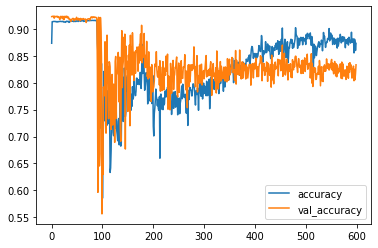

In [ ]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

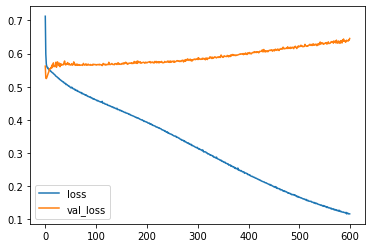

In [ ]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [ ]:
# model = tf.keras.models.load_model('/content/drive/My Drive/Colab Notebooks/data/chatbot_training_model4.h5')

In [ ]:
#Inference Stage

#encoder model
encoder_model = Model(encoder_inputs, _encoderstates)
encoder_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, 2174)] 0                                            
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 440), (None, 4602400     input_1[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (3, None, 440)       0           lstm[0][0]                       
                                                                 lstm[0][1]                       
                                                                 lstm[0][2]                       
______________________________________________________________________________________________

In [ ]:
#decoder model
decoder_state_input_h = Input(shape=(lstm_dim,))
decoder_state_input_c = Input(shape=(lstm_dim,))
decoder_state_inputs = [decoder_state_input_h, decoder_state_input_c]

decoder_outputs2, state_h2, state_c2 = decoder_lstm(decoder_inputs, initial_state=decoder_state_inputs)
decoder_states2 = [state_h2, state_c2]
decoder_outputs2 = decoder_dense(decoder_outputs2)

decoder_model = Model([decoder_inputs] + decoder_state_inputs, [decoder_outputs2] + decoder_states2)

In [ ]:
# reversing the word index dictionary to get words from index values
reverse_input_char_index = dict((i,char) for char, i in input_token_index.items())
reverse_output_char_index = dict((i,char) for char, i in output_token_index.items())
print(reverse_input_char_index)
print(reverse_output_char_index)

{0: 'a', 1: 'aaah', 2: 'aah', 3: 'abdy', 4: 'able', 5: 'abogados', 6: 'aboud', 7: 'about', 8: 'above', 9: 'aburres', 10: 'aburrido', 11: 'accept', 12: 'access', 13: 'according', 14: 'acostado', 15: 'act', 16: 'acting', 17: 'actors', 18: 'actris', 19: 'acts', 20: 'add', 21: 'added', 22: 'adivina', 23: 'advise', 24: 'aesthetics', 25: 'af', 26: 'affraid', 27: 'afraid', 28: 'after', 29: 'afterall', 30: 'again', 31: 'against', 32: 'agar', 33: 'aggressive', 34: 'ago', 35: 'agree', 36: 'ah', 37: 'ahah', 38: 'ahhh', 39: 'ahjhhw', 40: 'ahora', 41: 'ai', 42: 'aiml', 43: 'aires', 44: 'aku', 45: 'al', 46: 'alabrar', 47: 'albatta', 48: 'aldama', 49: 'alegro', 50: 'alemn', 51: 'algo', 52: 'algorithmic', 53: 'algorithms', 54: 'alguien', 55: 'alguna', 56: 'alive', 57: 'all', 58: 'allo', 59: 'allow', 60: 'allows', 61: 'almost', 62: 'alo', 63: 'alone', 64: 'aloo', 65: 'alooo', 66: 'aloooo', 67: 'aloooooo', 68: 'aloooooooo', 69: 'alooooooooooo', 70: 'alot', 71: 'already', 72: 'also', 73: 'alternatives', 

In [ ]:
# function to predict words
def decode_seq(input_seq):
  state_values = encoder_model.predict(input_seq)

  target_seq = np.zeros((1,1,num_decoder_tokens))

  target_seq[0,0,output_token_index['START']] = 1

  stop_condition = False
  decoded_sentence = ''

  while not stop_condition:
    output_tokens, h, c = decoder_model.predict([target_seq] + state_values)

    sampled_token_index = np.argmax(output_tokens[0,-1,:])
    sampled_char = reverse_output_char_index[sampled_token_index]

    decoded_sentence += ' ' + sampled_char

    if(sampled_char == 'END' or len(decoded_sentence) > max_output_length):
      stop_condition = True

    target_seq = np.zeros((1,1,num_decoder_tokens))
    target_seq[0,0,sampled_token_index] = 1

    state_values = [h,c] 

  return decoded_sentence

In [ ]:
class Chatbot:

  negative_responses = ("no", "nope", "nah", "naw", "not a chance", "sorry")
  exit_commands = ("quit", "pause", "exit", "goodbye", "bye", "later", "stop")

  #method to start conversation
  def start_chat(self):
    user_response = input("Hi, I'm a chatbot trained on random dialogs. Would you like to chat with me?\n")
    if user_response in self.negative_responses:
      print("Ok, have a great day!")
      return 
    self.chat(user_response)

  #method to handle the conversation
  def chat(self, reply):
    while not self.make_exit(reply):
      reply = input(self.generate_response(reply)+"\n")

  #method to convert user respones into matrix 
  def string_to_matrix(self, user_input):
    tokens = re.findall(r"[\w']+|[^\s\w]", user_input)
    user_input_matrix = np.zeros((1, max_input_length, num_encoder_tokens),dtype='float32')
    for timestep, token in enumerate(tokens):
        if token in input_token_index:
          # user_input_matrix[timestep, input_features_dict[token]] = 1.
          user_input_matrix[0,timestep,input_token_index[token]] = 1
    return user_input_matrix

  #Method that will create a response using seq2seq model we built
  def generate_response(self, user_input):
      input_matrix = self.string_to_matrix(user_input)
      chatbot_response = decode_seq(input_matrix)
      #Remove <START> and <END> tokens from chatbot_response
      chatbot_response = chatbot_response.replace("START",'')
      chatbot_response = chatbot_response.replace("END",'')
      return chatbot_response

  #Method to check for exit commands
  def make_exit(self, reply):
      for exit_command in self.exit_commands:
        if exit_command in reply:
          print("Ok, have a great day!")
          return True
      return False



In [ ]:
chatbot = Chatbot()

In [ ]:
chatbot.start_chat()

Hi, I'm a chatbot trained on random dialogs. Would you like to chat with me?
hi how are you
 hi there how are you    is a bot bot      and i can learn   
what is your name
 im rdany but you can call me dany  a robot   i like to talk with     
what is time
 is not on properly                   
what is your capability
 you are welcome                    
you suck
 nice                     was was robot
can i call you som
 i dont have a boss but i was study humans      it        
what is your age
 you are welcome                    
do you have any friends
 let me know if you like it     do you like it         
i like it
 you are welcome       first      it       
what is the weather today 
 is a bit friend                    
are you updated ?
 im from argentina south of the world  my name is rdany but you can call me dany   
are you my friend
 what do you like to read on the web about             
can you perform any action
 what is the problem with your happy  help you            
can